In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
#Import python sql kit and orm
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

## Retrieve data from SQL database

In [3]:
#Create engine using database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
#Use automap_base to reflect database tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [5]:
#Print the classes mapped to base
Base.classes.keys()

['measurement', 'station']

In [6]:
#Assign classes to their own variable
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
#Use inspector to get column names
inspector = inspect(engine)
tbl_names = inspector.get_table_names()

for tbl in tbl_names:
    columns = inspector.get_columns(tbl)
    print(tbl)
    for c in columns:
        print(c['name'], c["type"])
        
#prcp is precipitation, tobs is temperature observation data

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
#Create a session
session = Session(engine)

## Precipitation Analysis

In [9]:
#Get most recent date
recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
recent_date

('2017-08-23')

In [10]:
#Using the most recent date, get the entries from the last year
lastyear = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all()
lastyear

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [12]:
#Put last year's rain data into a dataframe
precip_df = pd.DataFrame(lastyear).set_index('date')
precip_df.rename(columns = {'prcp': 'precipitation'}, inplace=True)

#Sort values by date
precip_df.sort_values('date', inplace = True)

#Take only the highest recorded rainfall for the date for plotting
precip_plot_df = precip_df.groupby('date').max()

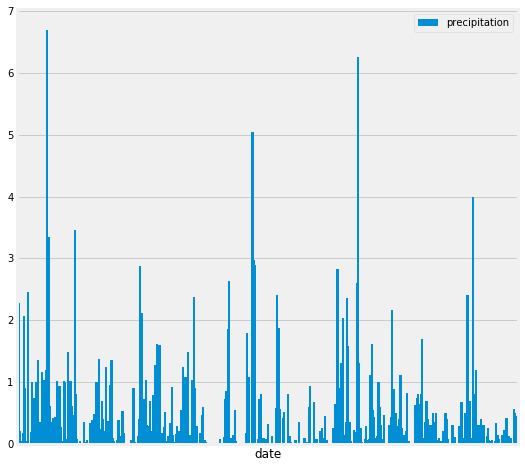

In [13]:
#Plot last years precipitation data
p_plot = precip_plot_df.plot(kind='bar', figsize=(8,8), width = 1.6)
p_plot.axes.get_xaxis().set_ticks([])

plt.show()

In [14]:
#Create a summary of precipitation data from 2016-08-24 to 2016-08-23
precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [15]:
#Find the number of stations
num_stations = session.query(Measurement.station).group_by(Measurement.station).count()
num_stations

9

In [16]:
#Find the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
#Find name of the most active station
most_active_station = session.query(Station.name).filter(Measurement.station == 'USC00519281').first()
most_active_station

('WAIKIKI 717.2, HI US')

In [18]:
#Find highest, lowest and average temperature for most active station (USC00519281)
hi_lo_avg_temp = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs))\
                .filter(Measurement.station == 'USC00519281').all()
hi_lo_avg_temp

[(85.0, 54.0, 71.66378066378067)]

In [19]:
#Find number of observations by day for station USC00519281 over last 12 months
ly_obs = session.query(Measurement.tobs).\
                        filter(Measurement.date > '2016-08-23', Measurement.station == 'USC00519281').all()
                        

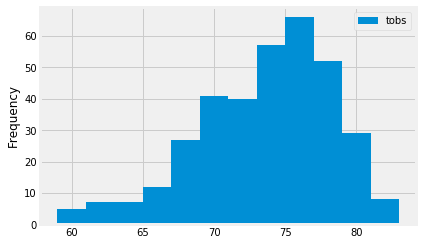

In [20]:
#Plot station USC00519281 tempertures over last year
station_df = pd.DataFrame(ly_obs)
s_plot = station_df.plot(kind='hist', bins=12)
plt.show()